In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [13]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=1e-2,
                 batch_size=1024,
                 n_epoch=30,
                 verbose=True,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=30, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.26914095878601074
[2, 12, 10, 9, 7, 14, 8, 10]
>>> Epoch = 2, Loss = 0.23651379346847534
[6, 13, 10, 10, 7, 9, 7, 11]
>>> Epoch = 3, Loss = 0.2358710914850235
[6, 14, 10, 10, 7, 9, 7, 11]
>>> Epoch = 4, Loss = 0.23878534138202667
[6, 13, 10, 10, 7, 9, 7, 10]
>>> Epoch = 5, Loss = 0.23592060804367065
[6, 13, 10, 10, 7, 9, 7, 11]
>>> Epoch = 6, Loss = 0.23503144085407257
[6, 12, 10, 11, 7, 9, 7, 11]
0 5
>>> Epoch = 7, Loss = 0.2299458235502243
[6, 13, 10, 4, 7, 9, 7, 11]
0 5
>>> Epoch = 8, Loss = 0.2338843047618866
[6, 13, 10, 4, 7, 9, 7, 11]
1 5
>>> Epoch = 9, Loss = 0.23089513182640076
[6, 12, 10, 4, 2, 9, 7, 11]
0 5
>>> Epoch = 10, Loss = 0.23409506678581238
[6, 11, 10, 4, 2, 9, 7, 11]
0 5
>>> Epoch = 11, Loss = 0.23856259882450104
[6, 12, 10, 4, 2, 13, 7, 11]
0 5
>>> Epoch = 12, Loss = 0.23155473172664642
[6, 11, 10, 4, 2, 13, 8, 10]
0 5
>>> Epoch = 13, Loss = 0.23274704813957214
[4, 11, 10, 4, 2, 13, 10, 8]
0 5
>>> Epoch = 14, Loss = 0.23586539924144745
[4, 1

In [14]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.356362521648407
[8, 5, 6, 5, 2, 5, 3, 9]
>>> Epoch = 2, Loss = 0.30848023295402527
[3, 5, 8, 5, 2, 5, 7, 7]
>>> Epoch = 3, Loss = 0.3038870692253113
[3, 5, 8, 5, 2, 8, 7, 7]
>>> Epoch = 4, Loss = 0.30974724888801575
[6, 5, 8, 5, 2, 8, 7, 7]
>>> Epoch = 5, Loss = 0.30742964148521423
[6, 5, 8, 5, 2, 8, 7, 7]
>>> Epoch = 6, Loss = 0.30362769961357117
[6, 5, 8, 5, 2, 8, 7, 9]
0 5
>>> Epoch = 7, Loss = 0.30245715379714966
[7, 5, 8, 5, 3, 8, 7, 8]
0 5
>>> Epoch = 8, Loss = 0.3039880096912384
[3, 5, 8, 5, 3, 8, 7, 5]
0 5
>>> Epoch = 9, Loss = 0.3038267493247986
[3, 5, 6, 5, 3, 6, 6, 5]
0 5
>>> Epoch = 10, Loss = 0.3065827190876007
[3, 6, 8, 5, 3, 4, 6, 5]
0 5
>>> Epoch = 11, Loss = 0.30103859305381775
[3, 6, 4, 6, 3, 4, 6, 5]
0 5
>>> Epoch = 12, Loss = 0.30213671922683716
[3, 6, 4, 6, 3, 4, 6, 5]
1 5
>>> Epoch = 13, Loss = 0.301925390958786
[2, 6, 4, 6, 3, 4, 6, 5]
0 5
>>> Epoch = 14, Loss = 0.30449816584587097
[2, 6, 4, 6, 3, 4, 6, 5]
1 5
>>> Epoch = 15, Loss = 0.2952

In [15]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 8, NMI = 0.0297
agglomerative, #Cols = 8, NMI = 0.0459


In [16]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 8, NMI = 0.0622
agglomerative, #Cols = 8, NMI = 0.0708


In [17]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 16, #NMI = 0.0371
#Bins = 3, #Cols = 24, #NMI = 0.1267
#Bins = 4, #Cols = 32, #NMI = 0.0116
#Bins = 5, #Cols = 40, #NMI = 0.0554
#Bins = 6, #Cols = 48, #NMI = 0.0314
#Bins = 7, #Cols = 56, #NMI = 0.1071
#Bins = 8, #Cols = 64, #NMI = 0.0788
#Bins = 9, #Cols = 72, #NMI = 0.0826
#Bins = 10, #Cols = 80, #NMI = 0.0122
#Bins = 11, #Cols = 88, #NMI = 0.0084
#Bins = 12, #Cols = 96, #NMI = 0.0042
#Bins = 13, #Cols = 104, #NMI = 0.0026
#Bins = 14, #Cols = 112, #NMI = 0.0018
#Bins = 15, #Cols = 120, #NMI = 0.0013
#Bins = 16, #Cols = 128, #NMI = 0.0002
#Bins = 17, #Cols = 136, #NMI = 0.0000
#Bins = 18, #Cols = 144, #NMI = 0.0000
#Bins = 19, #Cols = 152, #NMI = 0.0001
#Bins = 20, #Cols = 160, #NMI = 0.0003
agglomerative
#Bins = 2, #Cols = 16, #NMI = 0.0719
#Bins = 3, #Cols = 24, #NMI = 0.0680
#Bins = 4, #Cols = 32, #NMI = 0.0212
#Bins = 5, #Cols = 40, #NMI = 0.0702
#Bins = 6, #Cols = 48, #NMI = 0.0427
#Bins = 7, #Cols = 56, #NMI = 0.1157
#Bins = 8, #Cols = 64, #NMI = 0.001

In [18]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 16, #NMI = 0.0751
#Bins = 3, #Cols = 23, #NMI = 0.0188
#Bins = 4, #Cols = 30, #NMI = 0.0172
#Bins = 5, #Cols = 37, #NMI = 0.0059
#Bins = 6, #Cols = 45, #NMI = 0.0009
#Bins = 7, #Cols = 50, #NMI = 0.0025
#Bins = 8, #Cols = 58, #NMI = 0.0008
#Bins = 9, #Cols = 64, #NMI = 0.0013
#Bins = 10, #Cols = 72, #NMI = 0.0007
#Bins = 11, #Cols = 78, #NMI = 0.0007
#Bins = 12, #Cols = 84, #NMI = 0.0008
#Bins = 13, #Cols = 90, #NMI = 0.0002
#Bins = 14, #Cols = 96, #NMI = 0.0008
#Bins = 15, #Cols = 103, #NMI = 0.0000
#Bins = 16, #Cols = 110, #NMI = 0.0007
#Bins = 17, #Cols = 115, #NMI = 0.0000
#Bins = 18, #Cols = 120, #NMI = 0.0006
#Bins = 19, #Cols = 127, #NMI = 0.0000
#Bins = 20, #Cols = 134, #NMI = 0.0009
agglomerative
#Bins = 2, #Cols = 16, #NMI = 0.0523
#Bins = 3, #Cols = 23, #NMI = 0.0127
#Bins = 4, #Cols = 30, #NMI = 0.1207
#Bins = 5, #Cols = 37, #NMI = 0.0285
#Bins = 6, #Cols = 45, #NMI = 0.0108
#Bins = 7, #Cols = 50, #NMI = 0.0068
#Bins = 8, #Cols = 58, #NMI = 0.0117


In [19]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 27, NMI = 0.0369
#Init Bins = 15, #Cols = 21, NMI = 0.0706
#Init Bins = 20, #Cols = 54, NMI = 0.0323
agglomerative
#Init Bins = 10, #Cols = 27, NMI = 0.0379
#Init Bins = 15, #Cols = 21, NMI = 0.0417
#Init Bins = 20, #Cols = 54, NMI = 0.0390


In [20]:
%time clf_scores = exp.test_classification_performance(cv=3)

>>> Epoch = 1, Loss = 0.35158243775367737
[4, 5, 8, 7, 3, 8, 6, 7]
0 5
>>> Epoch = 2, Loss = 0.3081023395061493
[4, 9, 8, 3, 4, 8, 5, 7]
0 5
>>> Epoch = 3, Loss = 0.30632030963897705
[4, 9, 8, 3, 4, 8, 7, 5]
0 5
>>> Epoch = 4, Loss = 0.3075229227542877
[4, 8, 8, 3, 4, 8, 7, 5]
0 5
>>> Epoch = 5, Loss = 0.3076269328594208
[4, 8, 8, 3, 4, 8, 7, 5]
1 5
>>> Epoch = 6, Loss = 0.3056804835796356
[4, 8, 2, 3, 4, 8, 7, 5]
0 5
>>> Epoch = 7, Loss = 0.302372008562088
[4, 8, 2, 3, 4, 8, 3, 5]
0 5
>>> Epoch = 8, Loss = 0.30683228373527527
[4, 8, 2, 3, 4, 8, 3, 5]
1 5
>>> Epoch = 9, Loss = 0.3033464550971985
[2, 7, 2, 3, 5, 8, 3, 2]
0 5
>>> Epoch = 10, Loss = 0.30527618527412415
[2, 4, 2, 3, 2, 7, 3, 2]
0 5
>>> Epoch = 11, Loss = 0.3026838004589081
[3, 4, 2, 3, 2, 6, 3, 2]
0 5
>>> Epoch = 12, Loss = 0.29827460646629333
[3, 2, 2, 3, 2, 6, 9, 2]
0 5
>>> Epoch = 13, Loss = 0.29485538601875305
[3, 4, 2, 4, 2, 5, 9, 2]
0 5
>>> Epoch = 14, Loss = 0.30421704053878784
[3, 4, 2, 2, 2, 5, 9, 2]
0 5
>>> Epoch

[2, 2, 2, 2, 2, 2, 5, 4]
0 5
>>> Epoch = 22, Loss = 0.304164856672287
[2, 2, 2, 2, 2, 2, 2, 2]
0 5
>>> Epoch = 23, Loss = 0.3021274209022522
[2, 2, 2, 2, 2, 2, 2, 5]
0 5
>>> Epoch = 24, Loss = 0.29803577065467834
[2, 2, 2, 2, 2, 2, 2, 5]
1 5
>>> Epoch = 25, Loss = 0.29181376099586487
[2, 2, 2, 2, 2, 2, 2, 5]
2 5
>>> Epoch = 26, Loss = 0.29664117097854614
[2, 3, 2, 4, 2, 2, 2, 3]
0 5
>>> Epoch = 27, Loss = 0.30218157172203064
[2, 3, 4, 2, 2, 2, 2, 3]
0 5
>>> Epoch = 28, Loss = 0.2942159175872803
[2, 3, 2, 2, 2, 2, 2, 3]
0 5
>>> Epoch = 29, Loss = 0.2909153997898102
[2, 2, 4, 4, 2, 2, 6, 3]
0 5
>>> Epoch = 30, Loss = 0.3015090227127075
[2, 3, 2, 4, 2, 2, 5, 3]
0 5
1 5
Embedding Failed to Converge in given #epochs..
>>> Epoch = 1, Loss = 0.3281875550746918
[9, 6, 12, 7, 8, 8, 10, 9]
0 5
>>> Epoch = 2, Loss = 0.23675617575645447
[9, 8, 12, 7, 7, 9, 10, 9]
0 5
>>> Epoch = 3, Loss = 0.23136979341506958
[9, 8, 12, 7, 7, 8, 8, 9]
0 5
>>> Epoch = 4, Loss = 0.237915500998497
[9, 8, 12, 7, 7, 8, 

[7, 4, 8, 10, 4, 6, 11, 14]
0 5
>>> Epoch = 12, Loss = 0.23489223420619965
[7, 4, 8, 10, 4, 6, 12, 6]
0 5
>>> Epoch = 13, Loss = 0.23473145067691803
[2, 4, 8, 10, 4, 6, 11, 6]
0 5
>>> Epoch = 14, Loss = 0.2304236888885498
[2, 4, 8, 6, 4, 4, 11, 6]
0 5
>>> Epoch = 15, Loss = 0.2270219922065735
[2, 4, 5, 6, 4, 2, 11, 6]
0 5
>>> Epoch = 16, Loss = 0.23734208941459656
[2, 4, 5, 6, 4, 2, 11, 6]
1 5
>>> Epoch = 17, Loss = 0.2339920550584793
[2, 4, 5, 6, 4, 2, 11, 6]
2 5
>>> Epoch = 18, Loss = 0.23390382528305054
[2, 4, 5, 6, 4, 2, 12, 4]
0 5
>>> Epoch = 19, Loss = 0.23560692369937897
[2, 4, 5, 2, 4, 4, 12, 4]
0 5
>>> Epoch = 20, Loss = 0.2300763726234436
[2, 7, 3, 2, 4, 4, 12, 2]
0 5
>>> Epoch = 21, Loss = 0.2297181934118271
[2, 4, 3, 2, 4, 4, 12, 2]
0 5
>>> Epoch = 22, Loss = 0.2275206595659256
[2, 9, 3, 2, 3, 4, 12, 2]
0 5
>>> Epoch = 23, Loss = 0.2285633087158203
[2, 11, 3, 2, 3, 4, 12, 2]
0 5
>>> Epoch = 24, Loss = 0.23655104637145996
[4, 6, 3, 2, 3, 4, 12, 2]
0 5
>>> Epoch = 25, Loss = 

In [21]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 8.0, Accuracy = 0.721 (+/- 0.058)
LR performance
#cols = 8.0, Accuracy = 0.759 (+/- 0.018)


In [22]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 8.0, Accuracy = 0.723 (+/- 0.056)
LR performance
#cols = 8.0, Accuracy = 0.759 (+/- 0.054)


In [23]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 16.0, Accuracy = 0.673 (+/- 0.030)
#Bins = 3, #Avg Cols = 24.0, Accuracy = 0.712 (+/- 0.010)
#Bins = 4, #Avg Cols = 32.0, Accuracy = 0.734 (+/- 0.051)
#Bins = 5, #Avg Cols = 40.0, Accuracy = 0.701 (+/- 0.032)
#Bins = 6, #Avg Cols = 48.0, Accuracy = 0.708 (+/- 0.042)
#Bins = 7, #Avg Cols = 56.0, Accuracy = 0.720 (+/- 0.027)
#Bins = 8, #Avg Cols = 64.0, Accuracy = 0.716 (+/- 0.092)
#Bins = 9, #Avg Cols = 72.0, Accuracy = 0.721 (+/- 0.022)
#Bins = 10, #Avg Cols = 80.0, Accuracy = 0.717 (+/- 0.018)
#Bins = 11, #Avg Cols = 88.0, Accuracy = 0.677 (+/- 0.007)
#Bins = 12, #Avg Cols = 96.0, Accuracy = 0.727 (+/- 0.017)
#Bins = 13, #Avg Cols = 104.0, Accuracy = 0.685 (+/- 0.051)
#Bins = 14, #Avg Cols = 112.0, Accuracy = 0.716 (+/- 0.032)
#Bins = 15, #Avg Cols = 120.0, Accuracy = 0.703 (+/- 0.019)
#Bins = 16, #Avg Cols = 128.0, Accuracy = 0.698 (+/- 0.018)
#Bins = 17, #Avg Cols = 136.0, Accuracy = 0.685 (+/- 0.054)
#Bins = 18, #Avg Cols = 144.0, Accuracy = 0.

In [24]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 16.0, Accuracy = 0.714 (+/- 0.019)
#Bins = 3, #Avg Cols = 23.0, Accuracy = 0.714 (+/- 0.045)
#Bins = 4, #Avg Cols = 30.0, Accuracy = 0.727 (+/- 0.017)
#Bins = 5, #Avg Cols = 37.0, Accuracy = 0.724 (+/- 0.016)
#Bins = 6, #Avg Cols = 45.0, Accuracy = 0.723 (+/- 0.029)
#Bins = 7, #Avg Cols = 50.333333333333336, Accuracy = 0.716 (+/- 0.022)
#Bins = 8, #Avg Cols = 58.0, Accuracy = 0.690 (+/- 0.013)
#Bins = 9, #Avg Cols = 64.0, Accuracy = 0.707 (+/- 0.028)
#Bins = 10, #Avg Cols = 71.66666666666667, Accuracy = 0.725 (+/- 0.004)
#Bins = 11, #Avg Cols = 77.33333333333333, Accuracy = 0.677 (+/- 0.035)
#Bins = 12, #Avg Cols = 84.33333333333333, Accuracy = 0.728 (+/- 0.019)
#Bins = 13, #Avg Cols = 90.33333333333333, Accuracy = 0.702 (+/- 0.058)
#Bins = 14, #Avg Cols = 96.66666666666667, Accuracy = 0.704 (+/- 0.037)
#Bins = 15, #Avg Cols = 102.66666666666667, Accuracy = 0.691 (+/- 0.022)
#Bins = 16, #Avg Cols = 110.0, Accuracy = 0.698 (+/- 0.036)
#Bins = 17, #A

In [25]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 23.666666666666668, Accuracy = 0.728 (+/- 0.035)
#Init Bins = 15, #Avg Cols = 32.0, Accuracy = 0.719 (+/- 0.036)
#Init Bins = 20, #Avg Cols = 59.0, Accuracy = 0.703 (+/- 0.078)
LR performance
#Init Bins = 10, #Avg Cols = 23.666666666666668, Accuracy = 0.754 (+/- 0.045)
#Init Bins = 15, #Avg Cols = 32.0, Accuracy = 0.757 (+/- 0.038)
#Init Bins = 20, #Avg Cols = 59.0, Accuracy = 0.738 (+/- 0.040)
NB performance
#Init Bins = 10, #Avg Cols = 23.666666666666668, Accuracy = 0.737 (+/- 0.039)
#Init Bins = 15, #Avg Cols = 32.0, Accuracy = 0.716 (+/- 0.063)
#Init Bins = 20, #Avg Cols = 59.0, Accuracy = 0.716 (+/- 0.062)


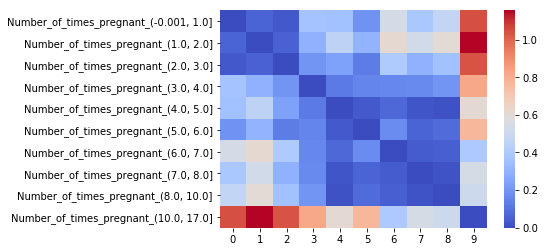

In [36]:
sb.plot_pairwise_distance_between_bins('Number_of_times_pregnant')

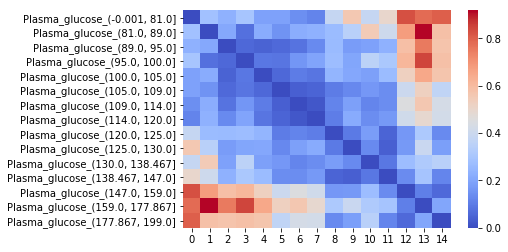

In [37]:
sb.plot_pairwise_distance_between_bins('Plasma_glucose')

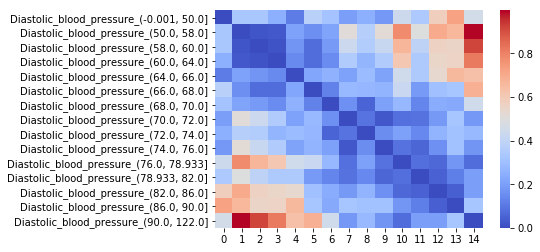

In [38]:
sb.plot_pairwise_distance_between_bins('Diastolic_blood_pressure')

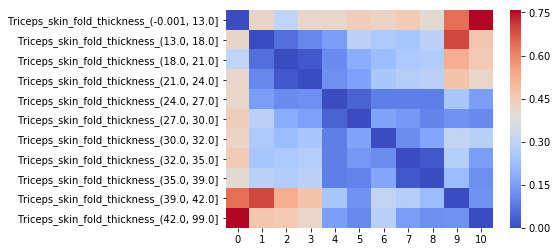

In [39]:
sb.plot_pairwise_distance_between_bins('Triceps_skin_fold_thickness')

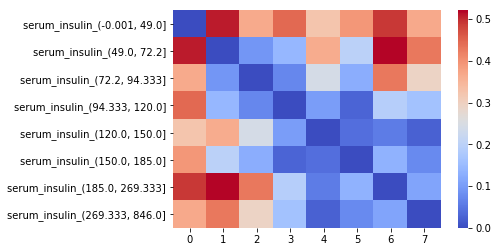

In [40]:
sb.plot_pairwise_distance_between_bins('serum_insulin')

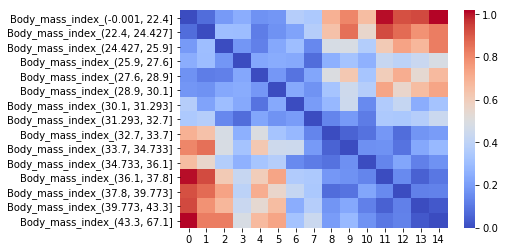

In [41]:
sb.plot_pairwise_distance_between_bins('Body_mass_index')

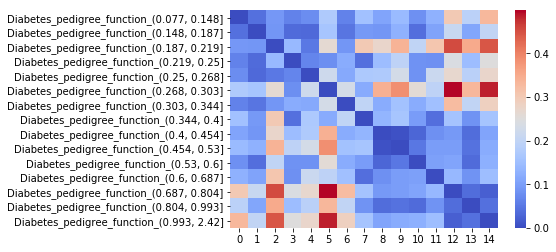

In [42]:
sb.plot_pairwise_distance_between_bins('Diabetes_pedigree_function')

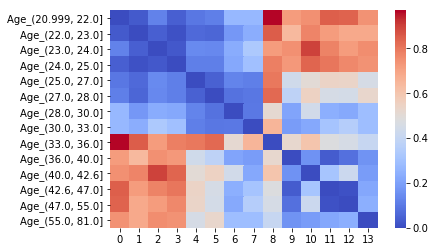

In [43]:
sb.plot_pairwise_distance_between_bins('Age')

In [35]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Number_of_times_pregnant
['(-0.001, 3.0]', '(3.0, 10.0]', '(10.0, 17.0]']
Plasma_glucose
['(-0.001, 147.0]', '(147.0, 199.0]']
Diastolic_blood_pressure
['(-0.001, 70.0]', '(70.0, 122.0]']
Triceps_skin_fold_thickness
['(-0.001, 13.0]', '(13.0, 24.0]', '(24.0, 39.0]', '(39.0, 99.0]']
serum_insulin
['(-0.001, 49.0]', '(49.0, 94.333]', '(94.333, 846.0]']
Body_mass_index
['(-0.001, 32.7]', '(32.7, 67.1]']
Diabetes_pedigree_function
['(0.077, 0.187]', '(0.187, 0.219]', '(0.219, 0.268]', '(0.268, 0.303]', '(0.303, 0.344]', '(0.344, 0.687]', '(0.687, 0.804]', '(0.804, 0.993]', '(0.993, 2.42]']
Age
['(20.999, 33.0]', '(33.0, 81.0]']
